In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("LTC_USD_1H.csv").iloc[::-1]

In [3]:
df

,Unix Timestamp,Date,Open,High,Low,Close,Volume
13759,1.539690e+12,16-10-2018 13.00,0.00,55.20,0.00,54.60,1770.339385
13758,1.539700e+12,16-10-2018 14.00,54.60,54.69,53.84,53.84,1005.899443
13757,1.539700e+12,16-10-2018 15.00,53.84,54.00,53.59,53.67,599.428332
13756,1.539710e+12,16-10-2018 16.00,53.67,53.67,52.83,52.88,414.829717
13755,1.539710e+12,16-10-2018 17.00,52.88,53.01,52.77,52.95,177.732171
...,...,...,...,...,...,...,...
4,1.589230e+12,11-05-2020 20.00,41.44,41.72,41.25,41.52,1107.153060
3,1.589230e+12,11-05-2020 21.00,41.52,41.91,40.95,41.26,320.621160
2,1.589230e+12,11-05-2020 22.00,41.26,41.56,41.14,41.39,474.191390
1,1.589240e+12,11-05-2020 23.00,41.39,41.89,41.17,41.70,261.744940


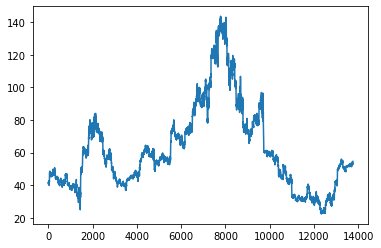

In [4]:
plt.plot(df["Close"])

In [5]:
yvals=np.array(df["Close"])
xvals=np.arange(0,yvals.shape[0])

In [6]:
coins=1000
cash=200000

In [7]:
net_assets_beginning=xvals[0]*1000+cash

In [8]:
net_assets_beginning

200000

In [9]:
preds=[]
preds.append(yvals[0])
preds.append(yvals[1])
preds.append(yvals[2])
preds.append(yvals[3])

In [10]:
import warnings

warnings.filterwarnings("ignore")

for i in np.arange(3,np.array(df["Close"]).shape[0],1):
    x_pairs=[]
    y_pairs=[]
    
    x_pairs.append(xvals[i-3])
    x_pairs.append(xvals[i-2])
    x_pairs.append(xvals[i-1])
    x_pairs.append(xvals[i])
    
    y_pairs.append(yvals[i-3])
    y_pairs.append(yvals[i-2])
    y_pairs.append(yvals[i-1])
    y_pairs.append(xvals[i])
    
    x_pairs=np.array(x_pairs).reshape(-1,1)
    y_pairs=np.array(y_pairs).reshape(-1,1)
    
    if i<np.array(df["Close"]).shape[0]-1:
        
        regression = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        
        regression.fit(x_pairs, y_pairs)
        
        pred=regression.predict(np.array([xvals[i+1]]).reshape(-1,1))
        
        preds.append(pred)
        
        if pred-yvals[i]>0:
            
            if coins==1000:
                
                pass
            
            else:
                
                coins=1000
                cash=cash-(1000*yvals[i]) 
        
        else:
            
            if coins==1000:
                
                coins=0
                cash=cash+(1000*yvals[i])
                
            else:
                
                pass
                
    else:
        
        pass

In [11]:
cash

342300.0

In [12]:
coins

1000

In [13]:
net_assets_end=cash+(coins*np.array(df["Close"])[-1])

In [14]:
net_assets_end

384000.0

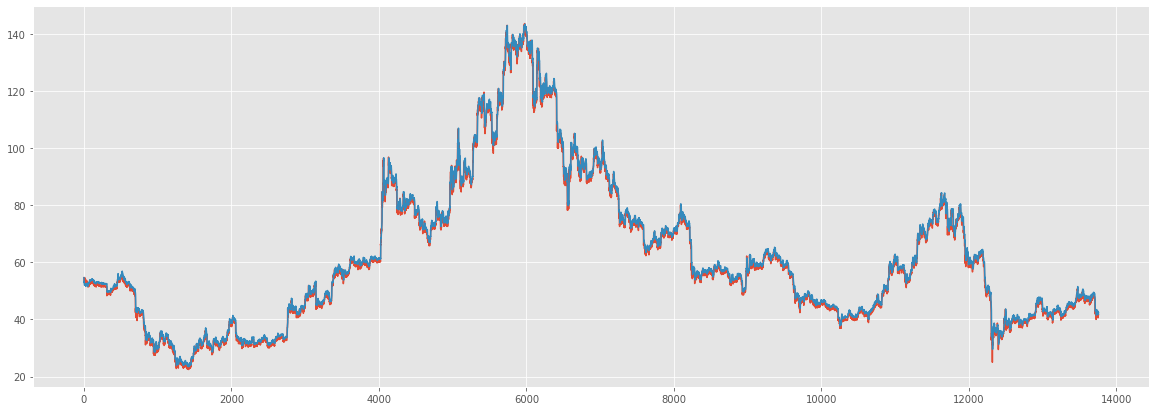

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 7))
plt.plot(xvals,yvals)
plt.plot(xvals,preds)